In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt


In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 7s 1us/step


In [3]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)


In [4]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


In [5]:
# Define number of labels
num_labels = 10


In [6]:
# Define input shape of the images
input_shape = x_train.shape[1:]



In [7]:
# Define the CNN
model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=input_shape),
    MaxPooling2D(2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_labels, activation='softmax')
])


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [9]:
# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_labels)
y_test = tf.keras.utils.to_categorical(y_test, num_labels)



In [10]:
# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))



Epoch 1/10
469/469 [==============================] - 26s 53ms/step - loss: 0.3085 - accuracy: 0.9044 - val_loss: 0.0615 - val_accuracy: 0.9806
Epoch 2/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0976 - accuracy: 0.9708 - val_loss: 0.0376 - val_accuracy: 0.9873
Epoch 3/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0728 - accuracy: 0.9780 - val_loss: 0.0351 - val_accuracy: 0.9880
Epoch 4/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0606 - accuracy: 0.9818 - val_loss: 0.0273 - val_accuracy: 0.9907
Epoch 5/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0529 - accuracy: 0.9848 - val_loss: 0.0281 - val_accuracy: 0.9905
Epoch 6/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0462 - accuracy: 0.9858 - val_loss: 0.0260 - val_accuracy: 0.9908
Epoch 7/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0409 - accuracy: 0.9881 - val_loss: 0.0232 - val_accuracy:

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)



313/313 [==============================] - 1s 4ms/step - loss: 0.0217 - accuracy: 0.9929
Test loss: 0.021728137508034706
Test accuracy: 0.992900013923645


In [12]:
# Select a random image from the test set
index = np.random.randint(0, x_test.shape[0])
image = x_test[index]
label = y_test[index]


In [13]:
# Segment the image
segmented_image = model.predict(np.expand_dims(image, axis=0))[0]
segmented_label = np.argmax(segmented_image)


1/1 [==============================] - 0s 91ms/step


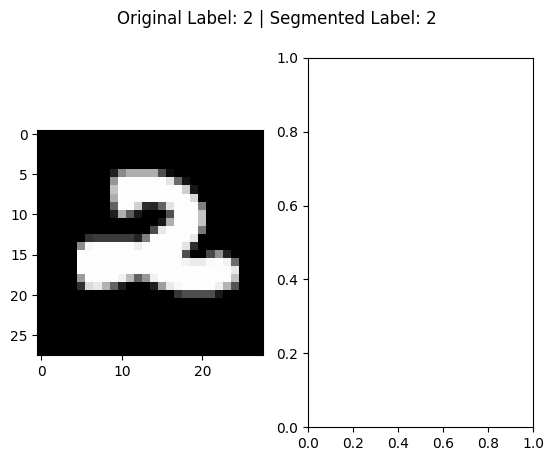

In [14]:

# Plot the original and segmented images
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(f'Original Label: {np.argmax(label)} | Segmented Label: {segmented_label}')
ax1.imshow(image, cmap='gray')
# ax2.imshow(segmented_image, cmap='gray'
plt.show()
